In [2]:
# import main libraries and preview of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Historical_Product_Demand_Cleaned.csv',parse_dates=['Date'])
df=pd.DataFrame(data)
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,Whse_A,Category_006,2011-11-18,1
1,Product_0504,Whse_J,Category_015,2011-12-05,1
2,Product_2165,Whse_C,Category_024,2011-12-06,1
3,Product_1699,Whse_J,Category_026,2011-12-07,1
4,Product_1680,Whse_S,Category_021,2011-12-09,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997700 entries, 0 to 997699
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_Code      997700 non-null  object        
 1   Warehouse         997700 non-null  object        
 2   Product_Category  997700 non-null  object        
 3   Date              997700 non-null  datetime64[ns]
 4   Order_Demand      997700 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.1+ MB


### Create a pivot table with monthly data as the index and product+warehouse as columns, while dropping columns with NaN or 0 values

In [4]:
whse_list=['Whse_A','Whse_J','Whse_C','Whse_S']
merged_table = None
for whse in whse_list:
    # Filter the DataFrame for Warehouse 
    df_filtered_whse = df[df['Warehouse'] == whse]

    # Group by 'Product_Code' and sum 'Order_Demand'
    df_grouped = df_filtered_whse.groupby(['Date', 'Product_Code'])['Order_Demand'].sum().reset_index()
    df_grouped = df_grouped[(df_grouped['Date'] > '2011-12-31') & (df_grouped['Date'] < '2017-01-01')]
    
    # Create a new column that combines 'Product_Code' and 'Warehouse'
    df_grouped['Product_Code_Whse'] = df_grouped['Product_Code'] + '_' + whse
    
    # Pivot the table to make 'Product_Code_Whse' columns and 'Date' as the index
    pivot_table = df_grouped.pivot(index='Date', columns='Product_Code_Whse', values='Order_Demand')
    
    # Resample to monthly frequency and sum the values for each month
    pivot_table = pivot_table.resample('M').sum()
    
    # Want to drop columns with values Nan or 0
    # Printing number of columns in per warehouse before and after dropping columns 
    print(f"Total number of columns in {whse} is : {pivot_table.shape[1]}")
    pivot_table =pivot_table.replace(0, np.nan)
    pivot_table=pivot_table.dropna(axis=1)
    print(f"Number of columns in {whse} without NaN is : {pivot_table.shape[1]}")
    
    # Merge the current warehouse data with the merged table
    if merged_table is None:
        merged_table = pivot_table
    else:
        merged_table = pd.concat([merged_table, pivot_table], axis=1)
    
# Save the merged table to a single CSV file
merged_table.to_csv('merged_table.csv')
    
# Printing the number of columns in the merged table
print(f"Total number of columns in the merged table is: {merged_table.shape[1]}")

Total number of columns in Whse_A is : 427
Number of columns in Whse_A without NaN is : 102
Total number of columns in Whse_J is : 1625
Number of columns in Whse_J without NaN is : 547
Total number of columns in Whse_C is : 244
Number of columns in Whse_C without NaN is : 37
Total number of columns in Whse_S is : 553
Number of columns in Whse_S without NaN is : 28
Total number of columns in the merged table is: 714


In [5]:
merged_table.shape[1]

714

In [6]:
merged_table.head()

Product_Code_Whse,Product_0020_Whse_A,Product_0031_Whse_A,Product_0122_Whse_A,Product_0123_Whse_A,Product_0131_Whse_A,Product_0150_Whse_A,Product_0190_Whse_A,Product_0200_Whse_A,Product_0202_Whse_A,Product_0204_Whse_A,...,Product_1403_Whse_S,Product_1431_Whse_S,Product_1432_Whse_S,Product_1450_Whse_S,Product_1480_Whse_S,Product_1567_Whse_S,Product_1570_Whse_S,Product_1574_Whse_S,Product_1740_Whse_S,Product_2138_Whse_S
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,3500.0,10100.0,1080.0,8550.0,240.0,21.0,45.0,11636.0,3113.0,1490.0,...,157000.0,569000.0,2046000.0,32000.0,235000.0,473000.0,247000.0,597000.0,7000.0,4864.0
2012-02-29,6000.0,6400.0,4490.0,5430.0,20.0,52.0,664.0,13033.0,12179.0,646.0,...,221000.0,916000.0,7000.0,24000.0,49000.0,454500.0,271500.0,1721500.0,17000.0,7402.0
2012-03-31,600.0,3000.0,4110.0,8930.0,144.0,147.0,1079.0,8247.0,4185.0,2110.0,...,248000.0,777000.0,2064000.0,12000.0,250000.0,681500.0,144500.0,1069500.0,15000.0,8645.0
2012-04-30,6800.0,5400.0,560.0,3310.0,168.0,112.0,1606.0,12590.0,2378.0,527.0,...,222000.0,819000.0,16000.0,31000.0,29000.0,424000.0,196500.0,1938000.0,18000.0,24242.0
2012-05-31,5900.0,3500.0,4460.0,8390.0,456.0,181.0,976.0,19160.0,5001.0,4598.0,...,98000.0,960000.0,2299000.0,38000.0,45000.0,1239000.0,37500.0,1959500.0,7000.0,7127.0


### Checking for stationarity and dividing into two different "Stationary" and "Non-stationary" tables 

In [7]:
# using Augmented Dickey-Fuller (ADF) test (Null Hypothesis: it is non-stationary)

from statsmodels.tsa.stattools import adfuller

stationary_table = None
non_stationary_table = None

for var in merged_table:
    adfTest=adfuller(merged_table[var], autolag='AIC')
    if (adfTest[4]['1%'])>adfTest[0]: # if "critical values" > "Test Statistics" then stationary
        #print ("************Data is stationary************")
        if stationary_table is None:
            stationary_table = merged_table[var]
        else:
            stationary_table = pd.concat([stationary_table, merged_table[var]], axis=1)
    else:
        #print ("************Data is NOT stationary************")
        if non_stationary_table is None:
            non_stationary_table = merged_table[var]
        else:
            non_stationary_table = pd.concat([non_stationary_table, merged_table[var]], axis=1)

In [8]:
stationary_table.shape[1]

534

In [9]:
stationary_table.to_csv('stationary_table.csv')

In [10]:
non_stationary_table.shape[1]

180

In [11]:
non_stationary_table.to_csv('non_stationary_table.csv')

### Spliting stationary data to train (80%) and test (20%)

In [12]:
train_stat=stationary_table[:round(len(stationary_table)*0.8)]
test_stat=stationary_table[round(len(stationary_table)*0.8):]

#### Creating list of pdq values for provided ranges (pdq are hyperparameters for ARIMA/SARIMAX models)

In [13]:
import itertools

p=range(0,8) # p (Autoregressive order): quantifies how many past time steps are used to predict the current value
q=range(0,8) # q (Moving Average order): quantifies how many past forecast errors are used to predict the current value
d=range(0,2) # d (Integration order): represents the number of differences needed to make the series stationary

pdq_combination=list(itertools.product(p,d,q)) # total 128 combinations

In [14]:
# to avoid some warning messages running this code
import warnings
warnings.filterwarnings('ignore')

#### Implementing ARIMA model for stationary data, iterating through all feautures and record data for PRSME<10% only

In [66]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

import time

# Record the start time
start_time = time.time()

i=0
rmse=[]
order1=[]
prmse=[]
min_pdq_list_stat=[]
mean_stat=0
selected_columns_stat=[]

for column in train_stat:
    # Mean of the Test Data:
    mean_stat=test_stat[column].mean()
    # print(f"{column} average (test data only) is: {mean_stat}")
    for pdq in pdq_combination:
        try:
            # creating model object for current column and fit it
            model_stat = ARIMA(train_stat[column],order=pdq).fit()
            # making prediction on test data
            prediction_stat = model_stat.predict(start=len(train_stat),end=(len(stationary_table)-1))
            # model evaluation
            error_stat=np.sqrt(mean_squared_error(test_stat[column],prediction_stat))
            
            order1.append(pdq)
            
            rmse.append(error_stat)
            
            prmse.append((error_stat/mean_stat)*100)
            
        except:
            continue
        
    results = pd.DataFrame({'RMSE': rmse,'PRMSE': prmse,'Product_Name':column}, index=order1) 
    min_pdq = results['PRMSE'].idxmin()
    min_prmse_value = results['PRMSE'].min()
    i+=1
    if min_prmse_value<10:
        # gather min_pdq-s and train_stat[column] name in a separate table
        min_pdq_list_stat.append((min_pdq,column,min_prmse_value))
        selected_columns_stat.append(column)
        print(i,"accurate model")
    else:
        print(i,"model is not accurate, percentile RMSE is more than 10%")
        
# saving in a separate csv file pdq-s and product names for accurate models. 
pd.DataFrame(min_pdq_list_stat).to_csv('min_pdq_list_stat.csv')

# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

1 model is not accurate, percentile RMSE is more than 10%
2 model is not accurate, percentile RMSE is more than 10%
3 model is not accurate, percentile RMSE is more than 10%
4 model is not accurate, percentile RMSE is more than 10%
5 model is not accurate, percentile RMSE is more than 10%
6 model is not accurate, percentile RMSE is more than 10%
7 model is not accurate, percentile RMSE is more than 10%
8 model is not accurate, percentile RMSE is more than 10%
9 model is not accurate, percentile RMSE is more than 10%
10 model is not accurate, percentile RMSE is more than 10%
11 model is not accurate, percentile RMSE is more than 10%
12 model is not accurate, percentile RMSE is more than 10%
13 model is not accurate, percentile RMSE is more than 10%
14 model is not accurate, percentile RMSE is more than 10%
15 model is not accurate, percentile RMSE is more than 10%
16 model is not accurate, percentile RMSE is more than 10%
17 model is not accurate, percentile RMSE is more than 10%
18 mod

In [68]:
# 534 check where 200 were accurate
# Elapsed time: 17990 seconds = 300 minutes = 5 hours , next time 15724 secs

In [69]:
stationary_table_selected=stationary_table[selected_columns_stat]
train_stat_selected=train_stat[selected_columns_stat]
test_stat_selected=test_stat[selected_columns_stat]

In [71]:
# Initialize an empty DataFrame where will be kept forecasted demand per products for the next 6 months
forecast_stat_table_concat = pd.DataFrame()
prediction_stat_table_concat = pd.DataFrame()

for selected_pdq in min_pdq_list_stat: # iterating through the list of pdq, product_name values selected on the principle of PRMSE<10%
    print(selected_pdq)
    for column in train_stat_selected: # iterating through all products 
        if column == selected_pdq[1]:
            try:
                # creating model objects for current column and fit it, one for training data, another for all dataset
                model_stat = ARIMA(train_stat_selected[column], order=selected_pdq[0]).fit()
                model_stat_all = ARIMA(stationary_table_selected[column], order=selected_pdq[0]).fit() 
                
                # making prediction on test data
                prediction_stat = model_stat.predict(start=len(train_stat_selected), end=(len(stationary_table) - 1))

                # Create a DataFrame for predictions and set 'Date' as the index
                prediction_stat_table = pd.DataFrame({'Date': prediction_stat.index, column: prediction_stat.values})
                prediction_stat_table = prediction_stat_table.set_index('Date')
                
                # Concatenate the current prediction DataFrame to the result DataFrame
                prediction_stat_table_concat = pd.concat([prediction_stat_table_concat, prediction_stat_table], axis=1)
                
                # forecasting for 6 months over all dataset
                forecast_stat = model_stat_all.forecast(steps=6)
               
                # Create a DataFrame for the forecast and set 'Date' as the index
                forecast_stat_table = pd.DataFrame({'Date': forecast_stat.index, column: forecast_stat.values})
                forecast_stat_table = forecast_stat_table.set_index('Date')
                
                # Concatenate the current forecast DataFrame to the result DataFrame
                forecast_stat_table_concat = pd.concat([forecast_stat_table_concat, forecast_stat_table], axis=1)
            except:
                print('error')

# Concatenate and Print the resulting DataFrame with stationary forecasted datasets filtered by PRMSE<10%

stationary_table_selected_plus_forecast=pd.concat([stationary_table_selected,forecast_stat_table_concat,prediction_stat_table_concat],axis=0)
stationary_table_selected_plus_forecast.to_csv('stationary_table_selected_plus_forecast.csv')

((3, 1, 4), 'Product_1359_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1360_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1367_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1368_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1369_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1372_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1374_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1377_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1380_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1381_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1383_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1388_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1389_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1391_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1392_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1394_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1396_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1397_Whse_J', 8.758486707036159)
((3, 1, 4), 'Product_1398_Wh

In [65]:
pd.DataFrame(min_pdq_list_non_stat).to_csv('min_pdq_list_non_stat.csv')

NameError: name 'min_pdq_list_non_stat' is not defined

### SARIMAX for Non-Stationary data

#### Spliting non-stationary data to train (80%) and test (20%)

In [65]:
train_non_stat=non_stationary_table[:round(len(non_stationary_table)*0.8)]
test_non_stat=non_stationary_table[round(len(non_stationary_table)*0.8):]

#### Implementing SARIMA model for stationary data, iterating through all feautures and record data for PRSME<10% only

In [83]:
#SARIMAX
import statsmodels.api as sm

# Record the start time
start_time = time.time()

i=0
rmse=[]
order1=[]
prmse=[]
mean_stat=0
min_pdqs_list_non_stat=[]
selected_columns_non_stat=[]
results = pd.DataFrame()
min_prmse_value=0
min_pdq=()
min_pdqs=()

for column in train_non_stat.iloc[:,112:122]:
    # Mean of the Test Data:
    mean_non_stat=test_non_stat[column].mean()
    print(column,mean_non_stat)
    
    for pdq in pdq_combination:
        try:
            # creating model object for current column and fit it
                     
            pdqs=pdq+(12,) # adding seasonality "s"
            print(pdqs)
            model_non_stat = sm.tsa.statespace.SARIMAX(train_non_stat[column],order=pdq,seasonal_order=pdqs).fit()
        
            # making prediction on test data
            prediction_non_stat = model_non_stat.predict(start=len(train_non_stat),end=(len(non_stationary_table)-1))
        
            # model evaluation
            error_non_stat=np.sqrt(mean_squared_error(test_non_stat[column],prediction_non_stat))
           
            order1.append(pdq)
            
            rmse.append(error_non_stat)
            
            prmse.append((error_non_stat/mean_non_stat)*100)
            
        except:
            continue
        
    results = pd.DataFrame({'RMSE': rmse,'PRMSE': prmse,'Product_Name':column}, index=order1) 
    min_pdq = results['PRMSE'].idxmin()
    min_prmse_value = results['PRMSE'].min()
    i+=1
    if min_prmse_value<10:
        # gather min_pdq-s and train_stat[column] name in a separate table
        min_pdq_list_non_stat.append((min_pdq,column,min_prmse_value))
        selected_columns_non_stat.append(column)
        print(i,"accurate model")
    else:
        print(i,"model is not accurate, percentile RMSE is more than 10%")
        
# saving in a separate csv file pdq-s and product names for non-stationary accurate models. 
pd.DataFrame(min_pdq_list_non_stat).to_csv('min_pdq_list_non_stat.csv')


# # Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Product_1493_Whse_J 74129.16666666667
(0, 0, 0, 12)
(0, 0, 1, 12)
(0, 0, 2, 12)
(0, 0, 3, 12)
(0, 0, 4, 12)
(0, 0, 5, 12)
(0, 0, 6, 12)
(0, 0, 7, 12)
(0, 1, 0, 12)
(0, 1, 1, 12)
(0, 1, 2, 12)
(0, 1, 3, 12)
(0, 1, 4, 12)
(0, 1, 5, 12)
(0, 1, 6, 12)
(0, 1, 7, 12)
(1, 0, 0, 12)
(1, 0, 1, 12)
(1, 0, 2, 12)
(1, 0, 3, 12)
(1, 0, 4, 12)
(1, 0, 5, 12)
(1, 0, 6, 12)
(1, 0, 7, 12)
(1, 1, 0, 12)
(1, 1, 1, 12)
(1, 1, 2, 12)
(1, 1, 3, 12)
(1, 1, 4, 12)
(1, 1, 5, 12)
(1, 1, 6, 12)
(1, 1, 7, 12)
(2, 0, 0, 12)
(2, 0, 1, 12)
(2, 0, 2, 12)
(2, 0, 3, 12)
(2, 0, 4, 12)
(2, 0, 5, 12)
(2, 0, 6, 12)
(2, 0, 7, 12)
(2, 1, 0, 12)
(2, 1, 1, 12)
(2, 1, 2, 12)
(2, 1, 3, 12)
(2, 1, 4, 12)
(2, 1, 5, 12)
(2, 1, 6, 12)
(2, 1, 7, 12)
(3, 0, 0, 12)
(3, 0, 1, 12)
(3, 0, 2, 12)
(3, 0, 3, 12)
(3, 0, 4, 12)
(3, 0, 5, 12)
(3, 0, 6, 12)
(3, 0, 7, 12)
(3, 1, 0, 12)
(3, 1, 1, 12)
(3, 1, 2, 12)
(3, 1, 3, 12)
(3, 1, 4, 12)
(3, 1, 5, 12)
(3, 1, 6, 12)
(3, 1, 7, 12)
(4, 0, 0, 12)
(4, 0, 1, 12)
(4, 0, 2, 12)
(4, 0, 3, 12)
(4, 0, 4, 

In [72]:
# With Sarimax model it took 1141 seconds to check one column (19 minutes). For all columns it will be 180x19=3420 minutes = 57 hours = 2.375 days

In [82]:
# from 10 to 20
# 10 model is not accurate, percentile RMSE is more than 10%
# Elapsed time: 9751.02217245102 seconds
# from 21 to 53 (31 checks)
# 9 models are accurate
# Elapsed time: 29187 seconds = 486 mins = 8.1 hours
# from 54 to 63 (9 checks)
# 0 models accurate
# from 64 to 84 (20 checks)
# 0 models accurate
# Elapsed time: 20569 seconds = 342 mins = 5.7 hours
# From 85 to 112 (26 checks)
# 0 model accurate
# Elapsed time: 23879 seconds = 397 mins = 6.6 hours
# FROM 112 TO 124 (10 checks)
# 0 models accurate
#Elapsed time: 8513 seconds = 141 mins = 2.4 hours

In [74]:
non_stationary_table_selected=non_stationary_table[selected_columns_non_stat]
train_non_stat_selected=train_non_stat[selected_columns_non_stat]
test_non_stat_selected=test_non_stat[selected_columns_non_stat]

In [76]:
# Initialize an empty DataFrame where will be kept forecasted demand per products for the next 6 months for non-stationary dataset
forecast_non_stat_table_concat = pd.DataFrame()

for selected_pdq in min_pdq_list_non_stat: # iterating through the list of pdqs, product_name values selected on the principle of PRMSE<10%
    print(selected_pdq)
    for column in train_non_stat_selected: # iterating through all products 
        if column == selected_pdq[1]:
            try:
                pdqs=pdq+(12,) # adding seasonality "s"
                # creating model objects for current column and fit it, one for training data, another for all dataset
                
                model_non_stat = sm.tsa.statespace.SARIMAX(train_non_stat_selected[column],order=pdq,seasonal_order=pdqs).fit()
                model_non_stat_all=sm.tsa.statespace.SARIMAX(non_stationary_table_selected[column],order=pdq,seasonal_order=pdqs).fit()
                
                # making prediction on test data
                prediction_non_stat = model_non_stat.predict(start=len(train_non_stat_selected), end=(len(non_stationary_table_selected) - 1))
                
                # forecasting for 6 months over all dataset
                forecast_non_stat = model_non_stat_all.forecast(steps=6)
               
                # Create a DataFrame for the forecast and set 'Date' as the index
                forecast_non_stat_table = pd.DataFrame({'Date': forecast_non_stat.index, column: forecast_non_stat.values})
                forecast_non_stat_table = forecast_non_stat_table.set_index('Date')
                
                # Concatenate the current forecast DataFrame to the result DataFrame
                forecast_non_stat_table_concat = pd.concat([forecast_non_stat_table_concat, forecast_non_stat_table], axis=1)
            except:
                print('error')

# Concatenate and Print the resulting DataFrame with non-stationary forecasted datasets filtered by PRMSE<10%

non_stationary_table_selected_plus_forecast=pd.concat([non_stationary_table_selected,forecast_non_stat_table_concat],axis=0)
non_stationary_table_selected_plus_forecast.to_csv('non_stationary_table_selected_plus_forecast.csv')

((5, 1, 3), 'Product_0620_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0625_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0657_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0658_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0664_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0677_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0704_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0711_Whse_J', 8.423795289045696)
((5, 1, 3), 'Product_0720_Whse_J', 8.423795289045696)


<Axes: xlabel='Date', ylabel='Product_0123_Whse_A'>

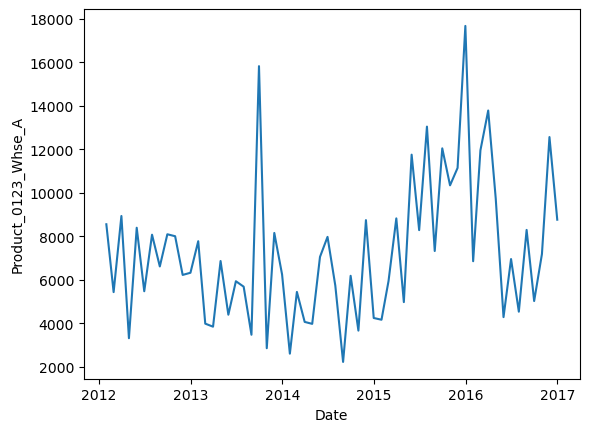

In [41]:
sns.lineplot(data=non_stationary_table.iloc[:,0:2], x=non_stationary_table.index, y=non_stationary_table.iloc[:,0:2].columns[0])